<a href="https://colab.research.google.com/github/ola-sumbo/ML_Course_9-11-20/blob/main/Other_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving cdata.csv to cdata.csv


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
dfs = pd.read_csv('/content/cdata.csv', delimiter='\t')
#Printing head
dfs.head()

,user.2.1,date,amount
0,a981eb02-7de9-4d8b-b9bc-565335de5173,1/17/2020,374.22
1,2744d3e6-2574-440d-a2c7-634a13d57bd6,1/10/2021,39.00
2,c3bffe0d-41c6-4423-b9d8-4083b4fe354a,9/15/2020,2.00
3,7d5fab03-ed87-490e-9a09-3f59bc4cdddd,8/31/2020,20.00
4,2a509db4-534f-46fc-99a4-18202045a935,3/18/2020,15.00


In [ ]:
len(dfs)

3143

In [ ]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('/content/cdata.csv', nrows = 3143, delimiter='\t')

#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:2900] 
test=df[2900:]

In [ ]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.date,format='%m/%d/%Y') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.date,format='%m/%d/%Y') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.date,format='%m/%d/%Y') 
test.index = test.Timestamp 
test = test.resample('D').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


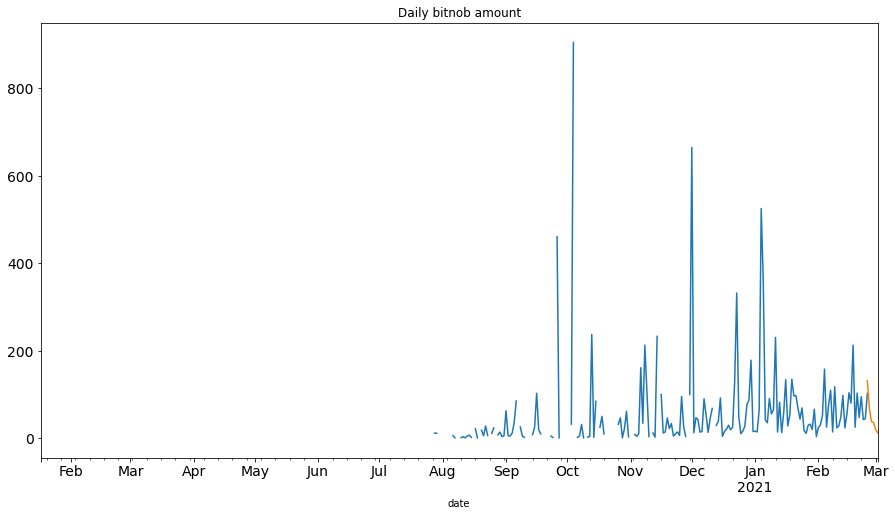

In [ ]:
#Plotting data
train.amount.plot(figsize=(15,8), title= 'Daily bitnob amount', fontsize=14)
test.amount.plot(figsize=(15,8), title= 'Daily bitnob amount', fontsize=14)
plt.show()

**Exponential Smoothening**

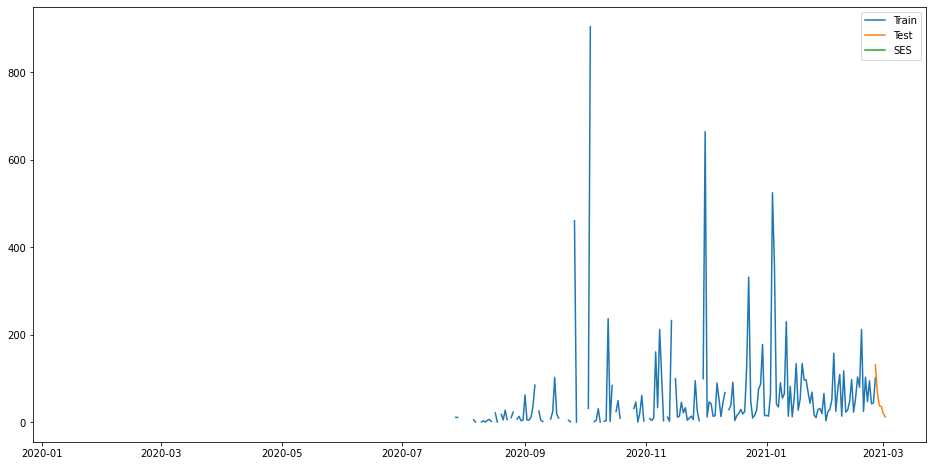

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['amount'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['amount'], label='Train')
plt.plot(test['amount'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

**Holts Trend Method**

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = sm.tsa.seasonal_decompose(train['amount'], freq=365)
decomposed.plot()
result = sm.tsa.stattools.adfuller(train.amount)
plt.show()
result


ValueError: ignored

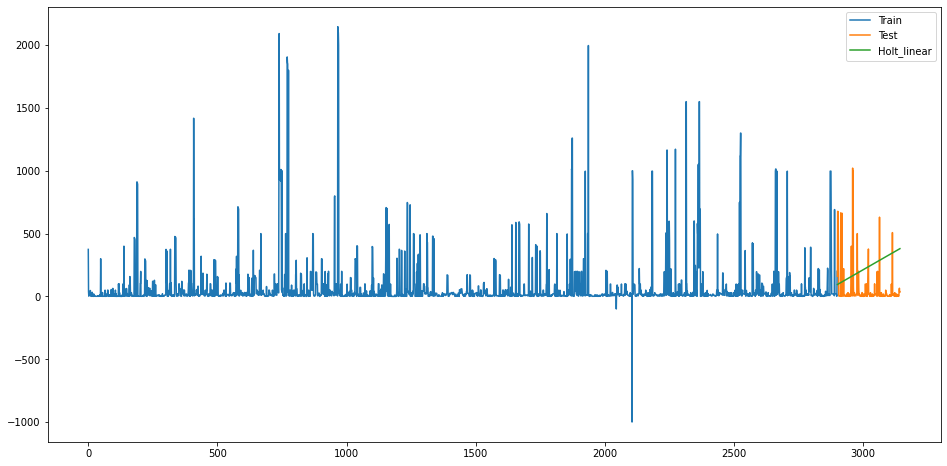

In [ ]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['amount'])).fit(smoothing_level = 0.5,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['amount'].values, label='Train')
plt.plot(test['amount'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

**Holt Winter Method**
 
 to handle seasonality and capture the model better

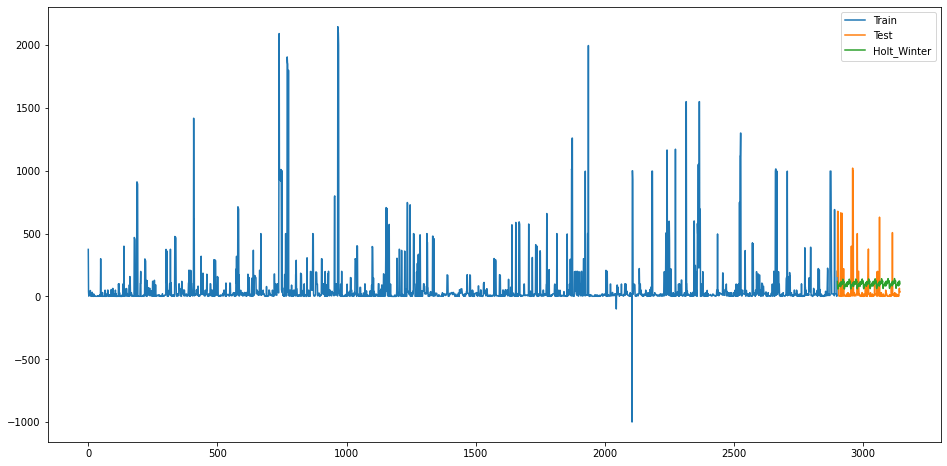

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['amount']) ,seasonal_periods=25 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['amount'].values, label='Train')
plt.plot(test['amount'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.amount, y_hat_avg.Holt_Winter))
print(rms)

160.47466751180136


**New Method for Forecasting using dfs**

In [ ]:
data = dfs.copy()
data = data.drop(columns='user.2.1', axis=1)

In [ ]:
#parse string to datetime 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

data['date'] = pd.to_datetime(data['date'], infer_datetime_format= True)
indexDataset = data.set_index(['date'])

In [ ]:
from datetime import datetime
indexDataset = indexDataset.sort_values(by='date')

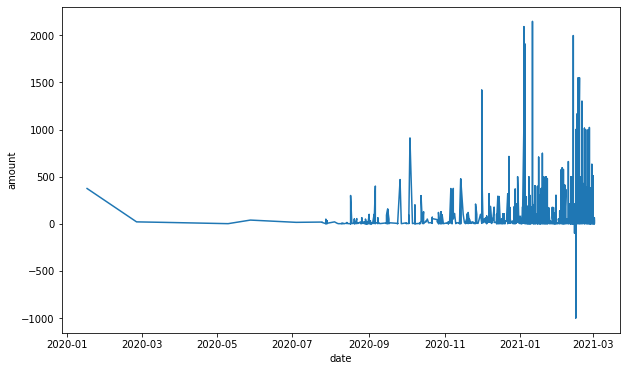

In [ ]:
## plot graph
plt.xlabel('date')
plt.ylabel('amount')
plt.plot(indexDataset)

In [ ]:
#Determine the rolling statistics
rolemean = indexDataset.rolling(window=12).mean().dropna()
rolstd = indexDataset.rolling(window=12).std().dropna()
print(rolemean, rolstd)

               amount
date                 
2020-07-28  45.518333
2020-07-28  15.166667
2020-07-28  15.250000
2020-07-28  14.083333
2020-07-29  14.000000
...               ...
2021-03-02   7.500000
2021-03-02   6.750000
2021-03-02   9.583333
2021-03-02   9.833333
2021-03-02  12.333333

[3132 rows x 1 columns]                 amount
date                  
2020-07-28  104.569066
2020-07-28   14.904748
2020-07-28   14.936989
2020-07-28   15.494623
2020-07-29   15.573871
...                ...
2021-03-02    9.080449
2021-03-02    9.225705
2021-03-02   12.078970
2021-03-02   11.937971
2021-03-02   13.825756

[3132 rows x 1 columns]


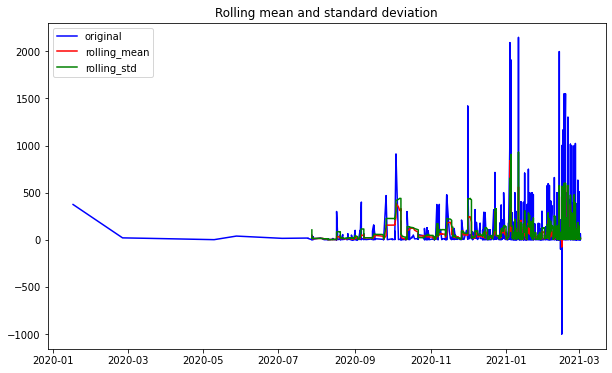

In [ ]:
#plotting rolling statistics
orig = plt.plot(indexDataset, color='blue', label='original')
mean = plt.plot(rolemean, color='red', label='rolling_mean')
std = plt.plot(rolstd, color='green', label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False) #MEAN AND STD DEV APPEAR CONSTANT SO OUR DATA IS STATIONERY 

In [ ]:
# Perform Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test:')
dftest = adfuller(indexDataset['amount'], autolag ='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test-statistics','p-value','#lags used','Number of observations used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s) '%key] = value
  
print(dfoutput) # pvalue less than 0.5 and critical value more than test statistics is good, stationary data

Result of Dickey-Fuller Test:
Test-statistics               -1.321258e+01
p-value                        1.039833e-24
#lags used                     1.000000e+01
Number of observations used    3.132000e+03
Critical Value (1%)           -3.432440e+00
Critical Value (5%)           -2.862463e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


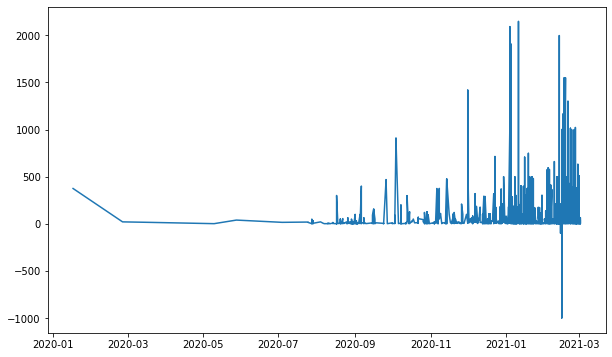

In [ ]:
#Estimating trend
indexDataset_logscale = np.log(indexDataset)
plt.plot(indexDataset)

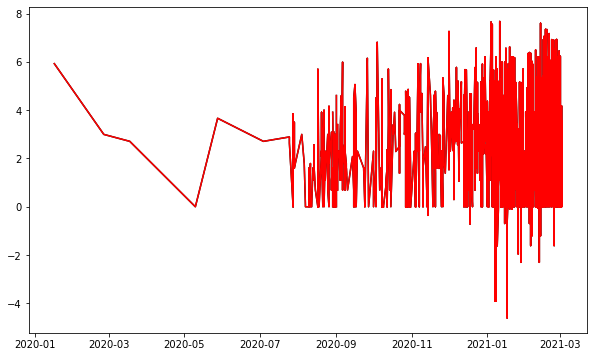

In [ ]:
#moving average recalculated
movingaverage = indexDataset_logscale.rolling(window=12).mean()
movingSTD = indexDataset_logscale.rolling(window=12).std()
plt.plot(indexDataset_logscale)
plt.plot(indexDataset_logscale, color='red')

In [ ]:
datalogscaleminusmovingaverage = indexDataset_logscale - movingaverage
datalogscaleminusmovingaverage.head()

#remove nan values 
datalogscaleminusmovingaverage.dropna(inplace=True)
datalogscaleminusmovingaverage.head(10)


,amount
date,
2020-07-28,1.568496
2020-07-28,0.322789
2020-07-28,1.060660
2020-07-28,-1.758191
2020-08-10,-1.495716
2020-08-10,-1.361596
2020-08-10,-1.070221
2020-08-10,-0.936101
2020-08-10,-0.682391


In [ ]:
#Check for stationarity in the logged data
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  #Determine rolling statistics
  movingaverage = timeseries.rolling(window = 12).mean()
  movingSTD = timeseries.rolling(window = 12).std()

  #plot rolling statistics
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(timeseries, color='red', label='rolling mean')
  std = plt.plot(timeseries, color='green', label='rolling std')
  plt.legend(loc='best')
  plt.title('Rolling mean and standard deviation')
  plt.show(block=False)

  #perform test for stationarity
  print('Result of dickey fuller test:')
  dftest = adfuller(indexDataset['amount'], autolag ='AIC')

  dfoutput = pd.Series(dftest[0:4], index=['Test-statistics','p-value','#lags used','Number of observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
  
  print(dfoutput)

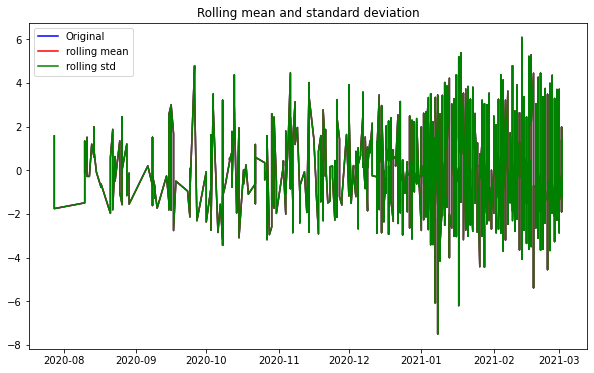

Result of dickey fuller test:
Test-statistics               -1.321258e+01
p-value                        1.039833e-24
#lags used                     1.000000e+01
Number of observations used    3.132000e+03
Critical Value (1%)           -3.432440e+00
Critical Value (5%)           -2.862463e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


In [ ]:
test_stationarity(datalogscaleminusmovingaverage)

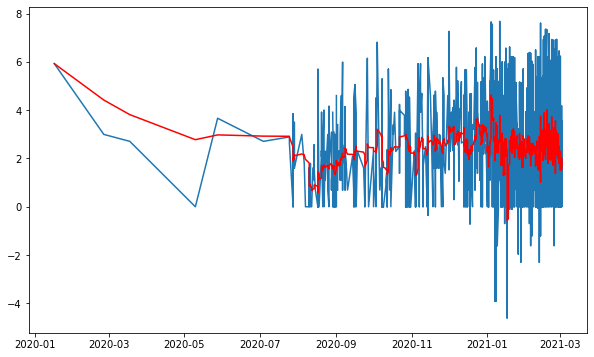

In [ ]:
expodecWA = indexDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexDataset_logscale)
plt.plot(expodecWA, color='red')

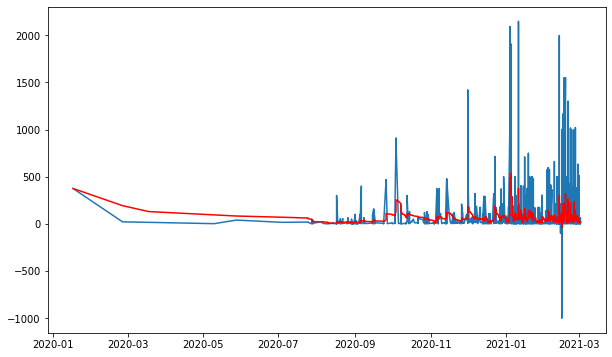

In [ ]:
expodecWAnolog = indexDataset.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexDataset)
plt.plot(expodecWAnolog, color='red')

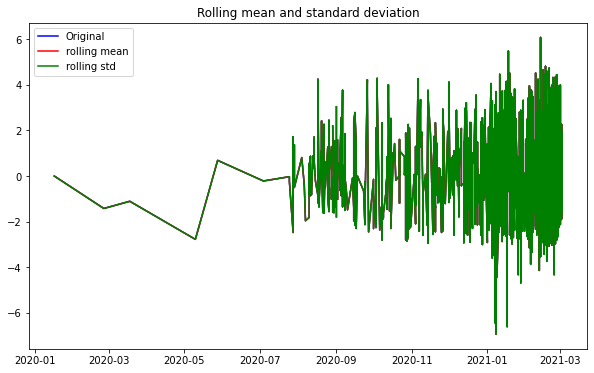

Result of dickey fuller test:
Test-statistics               -1.321258e+01
p-value                        1.039833e-24
#lags used                     1.000000e+01
Number of observations used    3.132000e+03
Critical Value (1%)           -3.432440e+00
Critical Value (5%)           -2.862463e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


In [ ]:
datasetlogscaleminusexpdecayavg = indexDataset_logscale - expodecWA
test_stationarity(datasetlogscaleminusexpdecayavg)

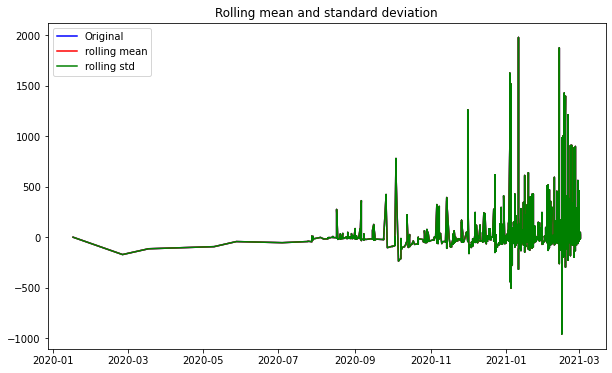

Result of dickey fuller test:
Test-statistics               -1.321258e+01
p-value                        1.039833e-24
#lags used                     1.000000e+01
Number of observations used    3.132000e+03
Critical Value (1%)           -3.432440e+00
Critical Value (5%)           -2.862463e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


In [ ]:
expdecay = indexDataset - expodecWAnolog
test_stationarity(expdecay)

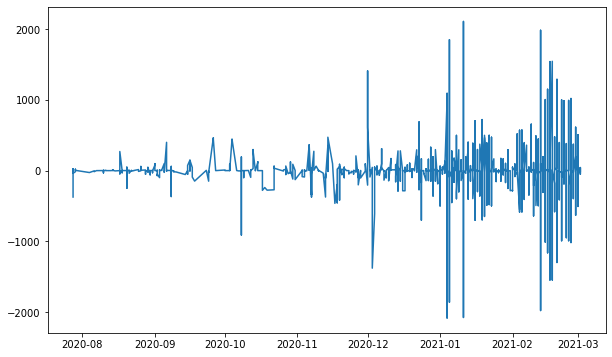

In [ ]:
#unlogged shift
datalogdiffshifting = indexDataset - indexDataset.shift(10)
plt.plot(datalogdiffshifting)

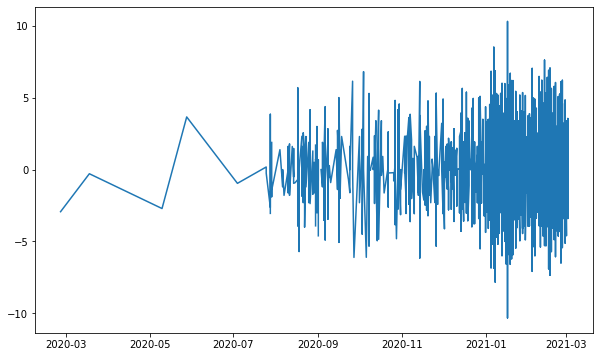

In [ ]:
#logged shift
datalogdiffshift = indexDataset_logscale - indexDataset_logscale.shift(1)
plt.plot(datalogdiffshift)

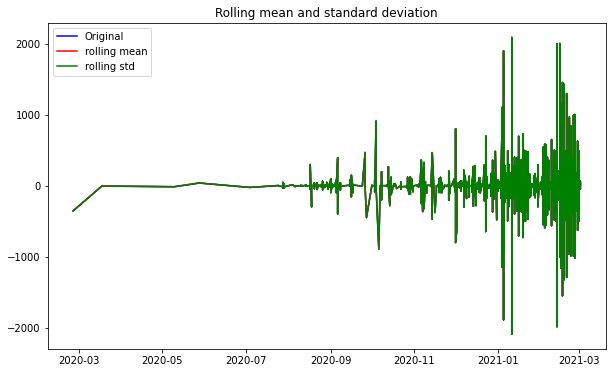

Result of dickey fuller test:
Test-statistics               -1.321258e+01
p-value                        1.039833e-24
#lags used                     1.000000e+01
Number of observations used    3.132000e+03
Critical Value (1%)           -3.432440e+00
Critical Value (5%)           -2.862463e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


In [ ]:
datalogdiffshifting.dropna(inplace=True)
test_stationarity(datalogdiffshifting)

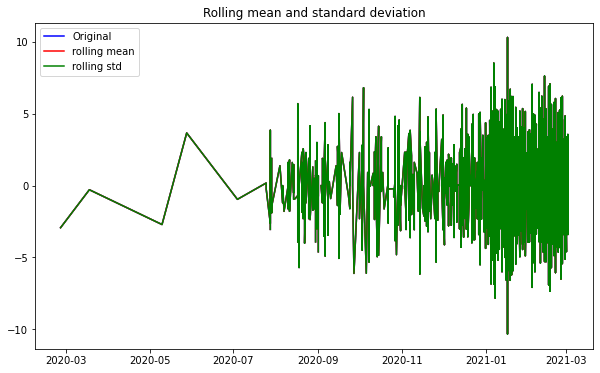

Result of dickey fuller test:
Test-statistics               -1.321258e+01
p-value                        1.039833e-24
#lags used                     1.000000e+01
Number of observations used    3.132000e+03
Critical Value (1%)           -3.432440e+00
Critical Value (5%)           -2.862463e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


In [ ]:
datalogdiffshift.dropna(inplace=True)
test_stationarity(datalogdiffshift)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexDataset, freq=365)

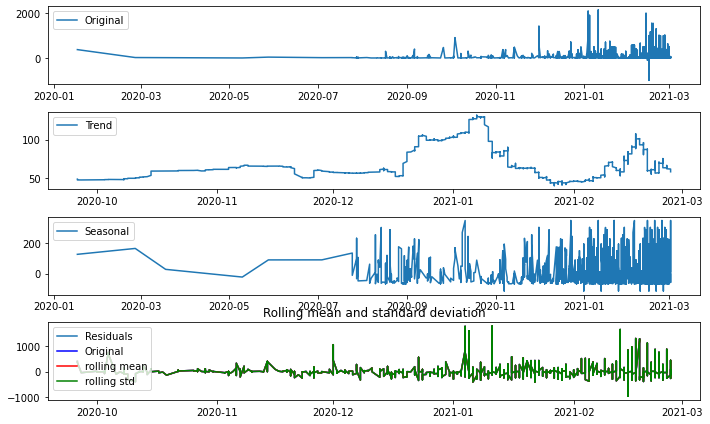

Result of dickey fuller test:
Test-statistics               -1.321258e+01
p-value                        1.039833e-24
#lags used                     1.000000e+01
Number of observations used    3.132000e+03
Critical Value (1%)           -3.432440e+00
Critical Value (5%)           -2.862463e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexDataset, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposed_data = residual
decomposed_data.dropna(inplace=True)
test_stationarity(decomposed_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  of the autocorrelation function results.


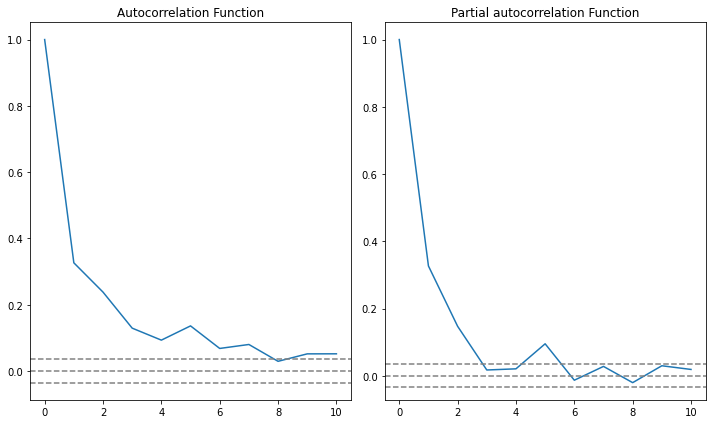

In [ ]:
#ACF and PACF plots:
import statsmodels
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexDataset, nlags=10)
lag_pacf = pacf(indexDataset, nlags=10, method='ols')

#PlotACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexDataset)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexDataset)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexDataset)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexDataset)),linestyle='--',color='gray')
plt.title('Partial autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  


Plotting AR Model


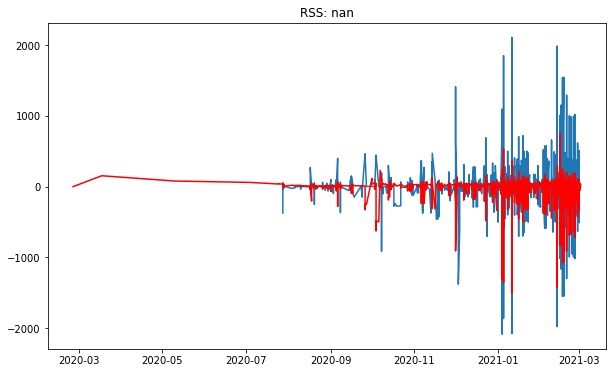

In [ ]:
#AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexDataset, order=(3,1,8))
result_AR = model.fit(disp = -1)
plt.plot(datalogdiffshifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.3f'% sum((result_AR.fittedvalues-datalogdiffshifting["amount"])**2))
print('Plotting AR Model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:


Plotting MA Model


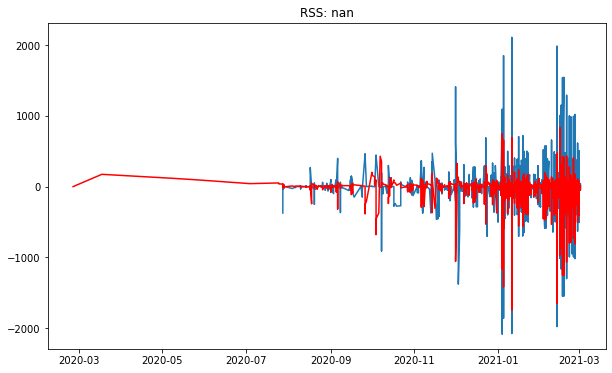

In [ ]:
#MA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexDataset, order=(0,1,1))
result_MA = model.fit(disp = -1)
plt.plot(datalogdiffshifting)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %.3f'% sum((result_MA.fittedvalues-datalogdiffshifting["amount"])**2))
print('Plotting MA Model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:


Plotting ARiMA Model


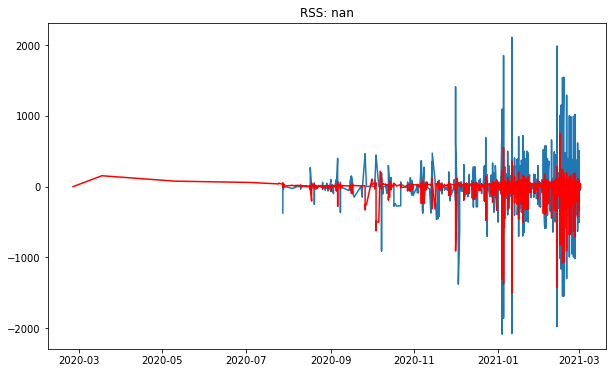

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexDataset, order=(2,1,7))
result_ARIMA = model.fit(disp = -1)
plt.plot(datalogdiffshifting)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.3f'% sum((result_ARIMA.fittedvalues-datalogdiffshifting["amount"])**2))
print('Plotting ARiMA Model')

In [ ]:
prediction_MA_diff = pd.Series(result_MA.fittedvalues, copy=True)
print(prediction_MA_diff)

date
2020-02-26     -0.019647
2020-03-18    174.011672
2020-05-10    115.925657
2020-05-28     93.615676
2020-07-04     42.287026
                 ...    
2021-03-02    -19.443099
2021-03-02      7.903124
2021-03-02      6.532125
2021-03-02    -22.790802
2021-03-02      5.956853
Length: 3142, dtype: float64


In [ ]:
#convert to cumulative sum
prediction_MA_cumsum = prediction_MA_diff.cumsum()
print(prediction_MA_cumsum.head())

date
2020-02-26     -0.019647
2020-03-18    173.992025
2020-05-10    289.917682
2020-05-28    383.533359
2020-07-04    425.820385
dtype: float64


In [ ]:
prediction_MA_log = pd.Series(indexDataset['amount'].iloc[0], index = indexDataset.index)
prediction_MA_log = prediction_MA_log.add(prediction_MA_cumsum,fill_value=0)
prediction_MA_log.head()

date
2020-01-17    374.220000
2020-02-26    374.200353
2020-03-18    548.212025
2020-05-10    664.137682
2020-05-28    757.753359
dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:2450: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


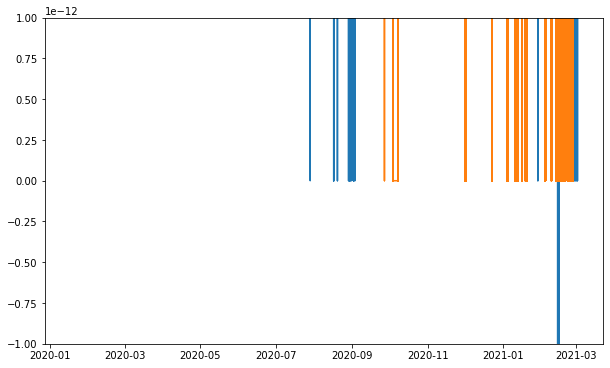

In [ ]:
predictions_MA = np.exp(prediction_MA_log)
plt.plot(indexDataset, label='true')
plt.plot(predictions_MA, label='predictions')

In [ ]:
indexDataset

,amount
date,
2020-01-17,374.22
2020-02-26,20.00
2020-03-18,15.00
2020-05-10,1.00
2020-05-28,39.00
...,...
2021-03-02,1.00
2021-03-02,1.00
2021-03-02,35.00


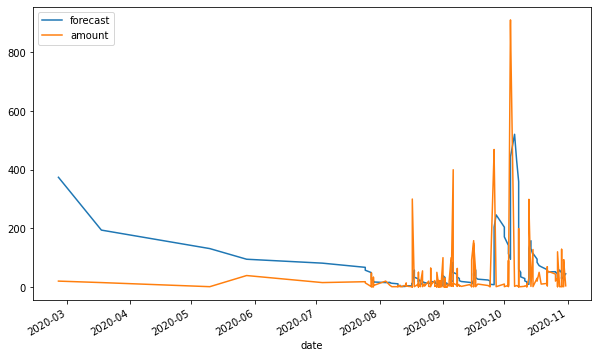

In [ ]:
result_MA.plot_predict(1, 263)
x = result_ARIMA.forecast(steps=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Issue warnings for unsupported indexes
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Issue warnings for unsupported indexes
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Issue warnings for unsupported indexes


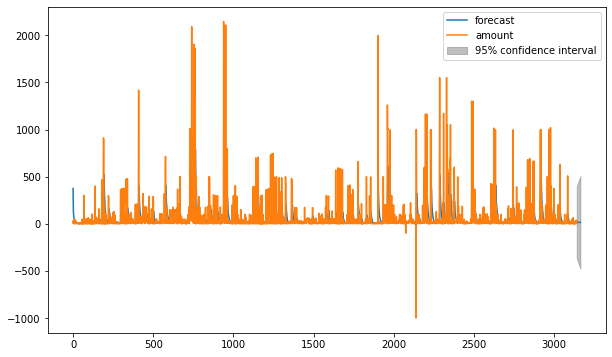

In [ ]:
result_MA.plot_predict(1, 3165)
x = result_ARIMA.forecast(steps=31)

In [ ]:
x[1]


array([186.63998164, 193.6069446 , 197.44598546, 198.20200074,
       198.34157371, 199.29591032, 199.34374303, 199.83908266,
       199.9182249 , 200.20007459, 200.2849762 , 200.45776113,
       200.53426475, 200.64635132, 200.70954482, 200.78528178,
       200.83504964, 200.88770068, 200.92583861, 200.96316113,
       200.99192717, 201.01873999, 201.04024204, 201.0596857 ,
       201.07568093, 201.08987729, 201.10175115, 201.11217147,
       201.1209835 , 201.12866645, 201.13521289])

In [ ]:
len(x[1])

30

In [ ]:
np.exp(x[1])

array([1.13949948e+81, 1.20900389e+84, 5.61955543e+85, 1.19683759e+86,
       1.37610316e+86, 3.57366729e+86, 3.74875968e+86, 6.15192269e+86,
       6.65858434e+86, 8.82648263e+86, 9.60859681e+86, 1.14208786e+87,
       1.23289081e+87, 1.37912360e+87, 1.46908790e+87, 1.58467396e+87,
       1.66553525e+87, 1.75557702e+87, 1.82382423e+87, 1.89318017e+87,
       1.94843031e+87, 2.00137992e+87, 2.04487968e+87, 2.08502867e+87,
       2.11864735e+87, 2.14893894e+87, 2.17460722e+87, 2.19738580e+87,
       2.21683479e+87, 2.23393223e+87, 2.24860450e+87, 2.26143095e+87,
       2.27247812e+87, 2.28210676e+87, 2.29042380e+87, 2.29766431e+87,
       2.30393479e+87, 2.30939426e+87, 2.31413444e+87, 2.31826599e+87,
       2.32186291e+87, 2.32500381e+87, 2.32774632e+87, 2.33014712e+87,
       2.33225024e+87, 2.33409697e+87, 2.33572058e+87, 2.33715135e+87,
       2.33841431e+87, 2.33953178e+87, 2.34052254e+87, 2.34140312e+87,
       2.34218759e+87, 2.34288827e+87, 2.34351570e+87, 2.34407910e+87,
      